<a href="https://colab.research.google.com/github/franklinokech/Regional-Clustering-Algorith/blob/main/Harvest_Long_Term_Plan_Clustering_Algorithm_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv

In [ ]:
df = pd.read_csv('/content/data.csv')
df.head(10)

,kcode,location_id,sublocation_id,category,Site Index,total volume,evaluation_count,signed,latest_eval_date,latest_eval_vol,harvest_count,latest_harvest_operation,latest_harvest_date,lat,lon,is_evaluated_2021,eval_date,eval_vol,extraction_distance,signed.1,phone_owner,mpesa_name,mpesa_no,specialcase
0,klf-2012-0112,Ngerenya,Ezamoyo,final harvest,SI12,16.81,0,NaN,NaN,NaN,0,NaN,NaN,-3.515524,39.850013,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,klf-2012-0245,Ngerenya,Ngerenya,final harvest,SI12,13.96,0,NaN,NaN,NaN,0,NaN,NaN,-3.519497,39.856159,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,klf-2012-0159,Dida,Dida,final harvest,SI12,13.22,0,NaN,NaN,NaN,1,Thinning,2018-05-30,-3.419497,39.798339,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,klf-2013-0589,Mwahera,Mwahera,final harvest,SI12,13.05,0,NaN,NaN,NaN,1,Thinning,2018-11-26,-3.322029,39.750131,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,klf-2013-0394,Mwahera,Dzikunze,final harvest,SI12,12.50,0,NaN,NaN,NaN,1,Thinning,2018-10-17,-3.291756,39.762249,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,klf-2012-0077,Mwahera,Ndugumnani,final harvest,SI12,12.39,0,NaN,NaN,NaN,1,Thinning,2019-02-19,-3.271059,39.766474,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,klf-2012-1354,Mwahera,Mwahera,final harvest,SI12,11.94,0,NaN,NaN,NaN,1,Thinning,2018-09-19,-3.354482,39.766184,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,klf-2012-0075,Mwahera,Mwahera,final harvest,SI12,11.66,0,NaN,NaN,NaN,1,Thinning,2018-09-19,-3.348407,39.750618,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,klf-2012-0732,Malanga,Malanga,final harvest,SI12,11.64,0,NaN,NaN,NaN,1,Thinning,2018-12-12,-3.284435,39.789951,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,klf-2013-1114,Bamba,Mwakwala,final harvest,SI12,11.48,0,NaN,NaN,NaN,0,NaN,NaN,-3.664515,39.507587,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Remove NA

df.dropna(axis=0,how='any',subset=['lat','lon'],inplace=True)

In [ ]:
# Select Only What We Need
# Variable with the Longitude and Latitude
X=df.loc[:,['kcode','lat','lon']]
X.head(10)

,kcode,lat,lon
0,klf-2012-0112,-3.515524,39.850013
1,klf-2012-0245,-3.519497,39.856159
2,klf-2012-0159,-3.419497,39.798339
3,klf-2013-0589,-3.322029,39.750131
4,klf-2013-0394,-3.291756,39.762249
5,klf-2012-0077,-3.271059,39.766474
6,klf-2012-1354,-3.354482,39.766184
7,klf-2012-0075,-3.348407,39.750618
8,klf-2012-0732,-3.284435,39.789951
9,klf-2013-1114,-3.664515,39.507587


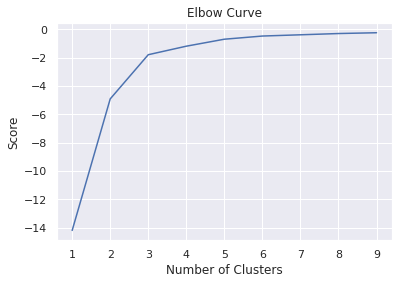

In [ ]:
# Get Elbow Curve
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = df[['lat']]
X_axis = df[['lon']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 4, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering.
X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point
X.head(10)

,kcode,lat,lon,cluster_label
0,klf-2012-0112,-3.515524,39.850013,1
1,klf-2012-0245,-3.519497,39.856159,1
2,klf-2012-0159,-3.419497,39.798339,3
3,klf-2013-0589,-3.322029,39.750131,3
4,klf-2013-0394,-3.291756,39.762249,3
5,klf-2012-0077,-3.271059,39.766474,3
6,klf-2012-1354,-3.354482,39.766184,3
7,klf-2012-0075,-3.348407,39.750618,3
8,klf-2012-0732,-3.284435,39.789951,3
9,klf-2013-1114,-3.664515,39.507587,2


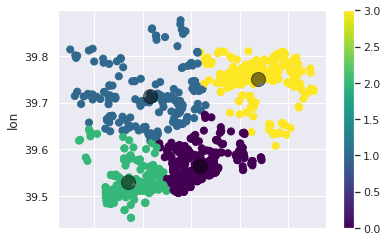

In [ ]:
X.plot.scatter(x = 'lat', y = 'lon', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)